## Data analysis

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Loading the dataset from uci ml repository
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets    #hi 

### Metadata

In [20]:
# metadata
print(adult.metadata)
feature_names = X.columns
print(feature_names)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

### Get numerical and categorical columns

In [21]:
numerical = list(X.select_dtypes(include='number').columns[1:])
categorial = list(set(X.columns[1:])-set(numerical))
numerical, categorial

(['fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'],
 ['relationship',
  'sex',
  'marital-status',
  'education',
  'native-country',
  'occupation',
  'race',
  'workclass'])

### Convert categorical columns to categorical

In [22]:
for column in categorial:
    print(column)
    X[column]= X[column].astype('category')

relationship
sex
marital-status
education
native-country
occupation
race
workclass


/tmp/ipykernel_7885/2749402504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column]= X[column].astype('category')
/tmp/ipykernel_7885/2749402504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column]= X[column].astype('category')
/tmp/ipykernel_7885/2749402504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [33]:
X.select_dtypes(include='category').describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,47879,48842,48842,47876,48842,48842,48842,48568
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33906,15784,22379,6172,19716,41762,32650,43832


In [31]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [64]:
y['income']=y['income'].apply(lambda s : s.replace('.', ''))
y['income']=y['income'].astype('category')
y['income']=y['income'].cat.codes

/tmp/ipykernel_7885/2481787065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income']=y['income'].apply(lambda s : s.replace('.', ''))
/tmp/ipykernel_7885/2481787065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income']=y['income'].astype('category')
/tmp/ipykernel_7885/2481787065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [65]:
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
48837,0
48838,0
48839,0
48840,0


## Data splits

In [66]:
seed=42

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## SOTA(?) Methods

In [68]:
import xgboost as xgb

In [71]:
xgb_model = xgb.XGBClassifier(enable_categorical=True)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
xgb_model.predict_proba(X_test)[:,1].shape

(9769,)

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

def eval(model):
    pred = model.predict(X_test)
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_test, pred)
    metrics['precision'] = precision_score(y_test, pred)
    metrics['recall'] = recall_score(y_test, pred)
    metrics['f1'] = f1_score(y_test, pred)

    metrics['roc_curve'] = RocCurveDisplay.from_estimator(model, X_test, y_test)
    metrics['prc'] = PrecisionRecallDisplay.from_estimator(model, X_test, y_test)

    return metrics

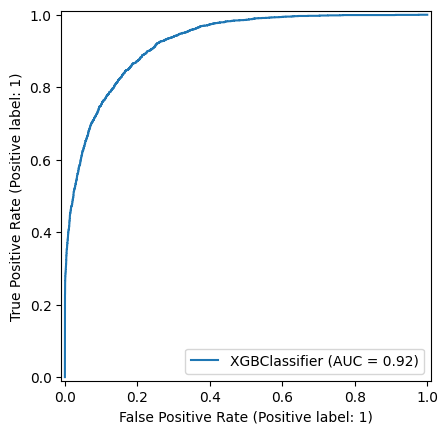

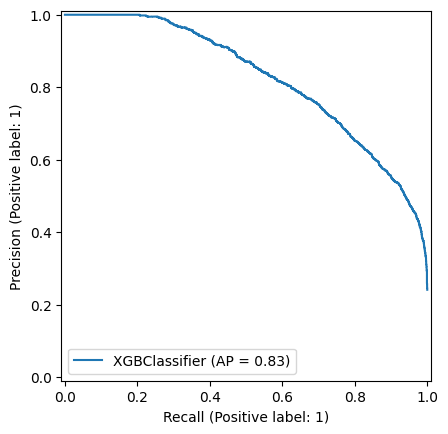

In [111]:
metrics=eval(xgb_model)